In [4]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [29]:
X = pd.read_csv("../Dataset/ABIDE2.csv")
group = X['group']

In [18]:
X.head()

,Unnamed: 0,site,subject,age,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,0,ABIDEII-KKI_1,29293,8.893151,Cancer,2750.0,306.0,354.0,2123.0,1451.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,1,ABIDEII-OHSU_1,28997,12.000000,Cancer,2836.0,186.0,354.0,2261.0,1584.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,2,ABIDEII-GU_1,28845,8.390000,Normal,3394.0,223.0,373.0,2827.0,1816.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,3,ABIDEII-NYU_1,29210,8.300000,Cancer,3382.0,266.0,422.0,2686.0,1893.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,4,ABIDEII-EMC_1,29894,7.772758,Normal,3080.0,161.0,346.0,2105.0,1307.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


In [30]:
X.drop(columns=["Unnamed: 0"], inplace=True)
# Take numerical columns
X = X.select_dtypes(include=[np.number])

In [21]:
X.head()

,subject,age,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,29293,8.893151,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,28997,12.000000,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,28845,8.390000,3394.0,223.0,373.0,2827.0,1816.0,1299.0,221.0,1657.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,29210,8.300000,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,29894,7.772758,3080.0,161.0,346.0,2105.0,1307.0,1004.0,254.0,1334.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [174]:
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [0.25402378 0.35531654 0.37717137 0.39260304 0.40621979 0.41869312
 0.43027065 0.44034215 0.44982338 0.45855915 0.46674347 0.4743645
 0.48179043 0.48914229 0.49598261 0.50268596 0.50916132 0.51535347
 0.52149078 0.52722083 0.53290011 0.5383683  0.54376169 0.54908176
 0.55424969 0.55935973 0.56438986 0.56918719 0.57388713 0.57849835
 0.58304933 0.58737919 0.59162394 0.59578572 0.59987662 0.60392161
 0.6078884  0.61180036 0.61564829 0.6193782  0.62301036 0.62660958
 0.63015176 0.63364544 0.63704459 0.64039828 0.6437178  0.6469829
 0.65014725 0.65323307 0.65629358 0.65928068 0.66225682 0.66516993
 0.66806212 0.67089434 0.67370908 0.67644368 0.67915888 0.68182092
 0.68444586 0.68702687 0.68956176 0.69207669 0.6945533  0.69698041
 0.69940037 0.70178585 0.70413212 0.70645344 0.70872686 0.71096301
 0.71317373 0.71536702 0.71752652 0.7196626  0.72178477 0.72387099
 0.72594666 0.72800468 0.73005465 0.73205973 0.7340446  0.73601935
 0.73795783 0.73988385 0.7417812  0.74

In [83]:
spectral = SpectralClustering(
    n_clusters=2,
    affinity='nearest_neighbors',
    n_neighbors=100,  # Điều chỉnh số lượng láng giềng
    assign_labels='kmeans',
    random_state=42
)
y_pred = spectral.fit_predict(X_pca)

C:\Users\admin\miniconda3\envs\MAILab2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [31]:
# Convert X['group'] to 0 and 1
y_gt = np.where(group == "Normal", 0, 1)

In [82]:
y_gt.sum()

463

In [84]:
y_pred.sum()

350

In [130]:
print(np.mean(y_pred == y_gt))
print(np.mean(y_pred == 1-y_gt))

# Function nhan y_pred va y_gt, kiem tra xem y_pred == y_gt voi y_pred == 1-y_gt cai nao cao hon thi output ra
def compare_predictions(y_pred, y_gt):
    correct = np.mean(y_pred == y_gt)
    incorrect = np.mean(y_pred == 1 - y_gt)

    return max(correct, incorrect)

0.43824701195219123
0.5617529880478087


In [175]:
from sklearn_minisom import MiniSOM

som_grid_size = (2,1)
som = MiniSOM(
    x = som_grid_size[0],
    y = som_grid_size[1],
    sigma=0.5,
    learning_rate=0.5,
    neighborhood_function="gaussian",
    random_seed=42,
)

In [176]:
y_pred = som.fit_predict(X_pca)

In [177]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [178]:
compare_predictions(y_pred, y_gt)

0.5617529880478087

Accuracy: 0.5618


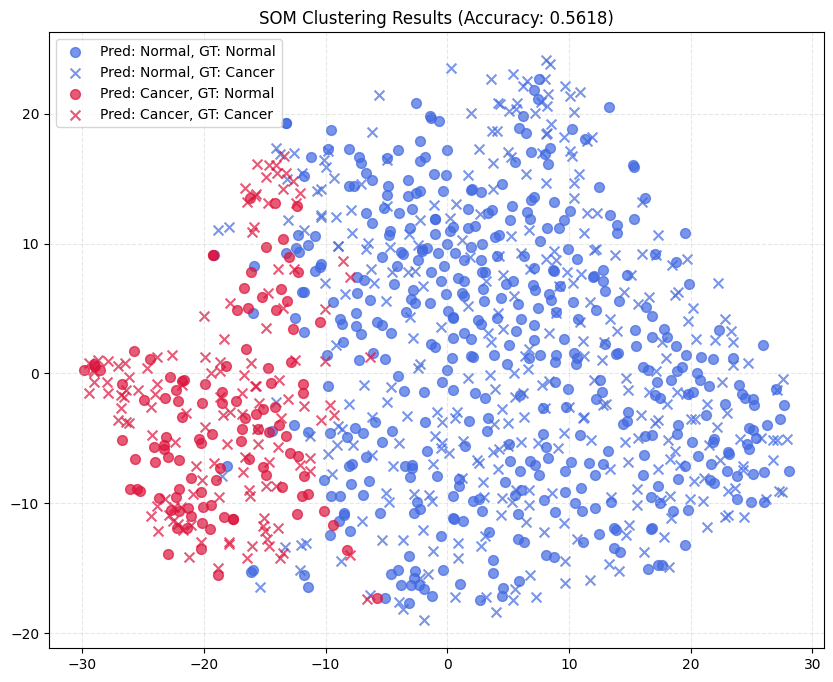

In [179]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

# Tính accuracy
accuracy = accuracy_score(y_gt, y_pred)
flipped_accuracy = accuracy_score(y_gt, 1-y_pred)
y_pred_final = y_pred if accuracy > flipped_accuracy else 1-y_pred
final_accuracy = max(accuracy, flipped_accuracy)

print(f"Accuracy: {final_accuracy:.4f}")

# Giảm chiều dữ liệu xuống 2D để trực quan hóa
tsne = TSNE(n_components=2, random_state=42)
X_viz = tsne.fit_transform(X_pca)

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))

# Vẽ các điểm dữ liệu theo cụm được dự đoán
colors = ['royalblue', 'crimson']
markers = ['o', 'x']
labels = ['Normal', 'Cancer']

# Vẽ theo cụm dự đoán (màu) và GT (marker)
for i in range(2):  # Cho mỗi cụm dự đoán
    for j in range(2):  # Cho mỗi GT
        mask = (y_pred_final == i) & (y_gt == j)
        plt.scatter(
            X_viz[mask, 0], X_viz[mask, 1],
            c=colors[i], marker=markers[j],
            alpha=0.7, s=50,
            label=f'Pred: {labels[i]}, GT: {labels[j]}'
        )

plt.title(f'SOM Clustering Results (Accuracy: {final_accuracy:.4f})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()